# Tornadoes in the USA, 1954 - 2013

#### Visualizing incidence and fatalities caused by tornadoes in the USA between 1954-2013.
#### The following analyses were performed: 

1. Yearly incidence
2. Incidence per state
3. Magnitude analysis 
4. Injuries and fatalities caused by tornadoes 
5. Geographical distribution of tornadoes

### Data source

- Kaggle 
##### https://www.kaggle.com/datasets/thedevastator/1950-2013-north-america-tornadoes-historical-tra

- Original data in Kaggle obtained from HIFLD and pre-cleaned
##### https://hifld-geoplatform.opendata.arcgis.com/datasets/geoplatform::historical-tornado-tracks-1/explore?location=35.011869%2C-114.214953%2C3.85

##### Note: the data prior to 1954 set was removed due to inconsistencies in the magnitude reporting

#### Variables

- OM: Origin Mode (Point or Line) (String)
- YR: Year (Integer)
- MO: Month (Integer)
- DY: Day (Integer)
- DATE: Date (String)
- TIME: Time (String)
- TZ: Time Zone (String)
- ST: State (String)
- STF: FIPS State Code (String)
- STN: State Name (String)
- MAG: Magnitude (Integer)
- INJ: Injuries (Integer)
- FAT: Fatalities (Integer)
- LOSS: Loss (Integer)
- CLOSS: Crop Loss (Integer)
- SLAT: Starting Latitude (Float)
- SLON: Starting Longitude (Float)
- ELAT: Ending Latitude (Float)
- ELON: Ending Longitude (Float)
- LEN: Length of Track (Float)

In [45]:
# Libraries needed 

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import squarify
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [46]:
# Note: to download static version of plotly graphs you need to install kaleido: 

# pip install -U kaleido
# or 
# conda install -c conda-forge python-kaleido

In [47]:
# Import the data frame 
df = pd.read_csv('data.csv', index_col=0)

In [48]:
df.head()

level_0  index    FID  OM    YR  MO  DY        DATE      TIME  TZ  ...  \
0    14228  14228  15229   1  1954   1  20  1954-01-20  05:30:00   3  ...   
1    14233  14233  15234   2  1954   1  20  1954-01-20  05:45:00   3  ...   
2    40377  40377  40378   3  1954   2  13  1954-02-13  10:30:00   3  ...   
3    30104  30104  30105   4  1954   2  15  1954-02-15  20:18:00   3  ...   
4     9220   9220  11221   5  1954   2  15  1954-02-15  22:10:00   3  ...   

  LOSS  CLOSS   SLAT    SLON   ELAT   ELON   LEN  WID  Shape_Leng  \
0  4.0    0.0  33.30  -88.83  33.47 -88.62  17.3   27    0.270185   
1  3.0    0.0  33.38  -88.42  33.45 -88.37   5.6  100    0.086023   
2  3.0    0.0  38.13 -105.47   0.00   0.00   0.5   17    0.000143   
3  5.0    0.0  35.48  -93.48   0.00   0.00   1.0  100    0.000144   
4  0.0    0.0  34.10  -94.15   0.00   0.00   0.1  167    0.000142   

             DATE_TIME  
0  1954-01-20 05:30:00  
1  1954-01-20 05:45:00  
2  1954-02-13 10:30:00  
3  1954-02-15 20:18:00  
4  1954-02-15 22:10:00  

[5 rows x 26 columns]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56866 entries, 0 to 56865
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     56866 non-null  int64  
 1   index       56866 non-null  int64  
 2   FID         56866 non-null  int64  
 3   OM          56866 non-null  int64  
 4   YR          56866 non-null  int64  
 5   MO          56866 non-null  int64  
 6   DY          56866 non-null  int64  
 7   DATE        56866 non-null  object 
 8   TIME        56866 non-null  object 
 9   TZ          56866 non-null  int64  
 10  ST          56866 non-null  object 
 11  STF         56866 non-null  int64  
 12  STN         56866 non-null  int64  
 13  MAG         56866 non-null  int64  
 14  INJ         56866 non-null  int64  
 15  FAT         56866 non-null  int64  
 16  LOSS        56866 non-null  float64
 17  CLOSS       56866 non-null  float64
 18  SLAT        56866 non-null  float64
 19  SLON        56866 non-nul

# Data visualizations

## 1. Yearly incidence 

In [50]:
# Group data by year and calculate the number of rows with size() on a MO column 
# Name the resulting column as 'No. of tornadoes'

yearly = df.groupby('YR')[['MO']].size().reset_index(name='No. of tornadoes') 

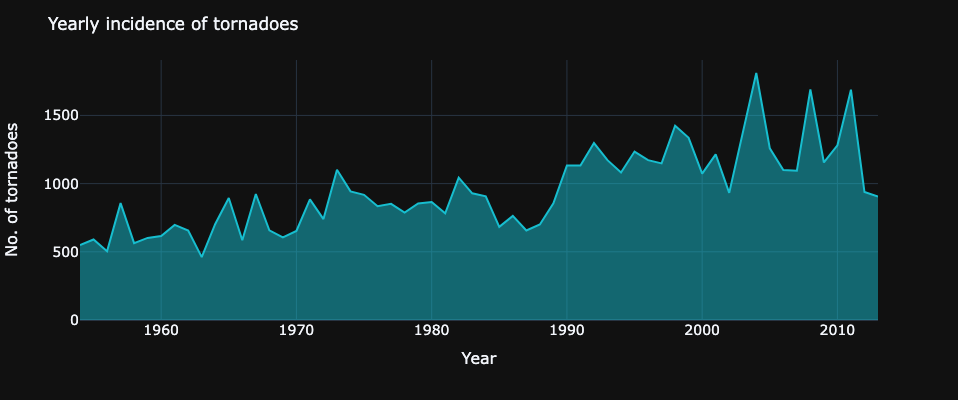

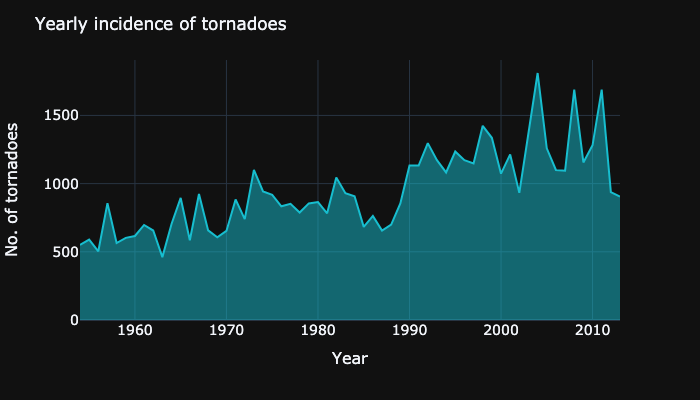

In [51]:
# Plot the grouped dataset as an interactive plot
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure(data = px.area(yearly, x="YR", y = 'No. of tornadoes',template="plotly_dark",
                width=700, height=400))
                
fig.update_traces(line=dict(color="#17BECF", width=2)) # specify line color in the plot
    
fig.update_layout(
        title = 'Yearly incidence of tornadoes',
        xaxis_title="Year", yaxis_title='No. of tornadoes',
        xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
        yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14))
)

fig.show()
fig.show('png')

# Specify connfigurations for exporting a static image 
config = {
    'format': 'png',
    'engine': 'kaleido',
    'scale': 3,
}
# Export the image 
fig.write_image('Yearly.png', **config)

## 2. State-specific incidence 

In [52]:
# Group data by state and measure how many each state occurs in the dataset by value_counts() function
# Sort on ST_INC column for plotting purposes 

state_inc =df.groupby('ST')[['ST']].value_counts().reset_index(name='ST_INC').sort_values(by = 'ST_INC', ascending = False)
state_inc

ST  ST_INC
42  TX    8117
14  KS    3709
34  OK    3392
8   FL    3129
27  NE    2607
10  IA    2253
12  IL    2211
22  MO    2033
4   CO    1941
23  MS    1899
0   AL    1856
16  LA    1757
40  SD    1672
21  MN    1628
1   AR    1627
26  ND    1417
9   GA    1400
13  IN    1330
47  WI    1258
25  NC    1176
41  TN    1073
33  OH     976
20  MI     953
39  SC     919
15  KY     851
36  PA     709
44  VA     642
49  WY     620
30  NM     537
32  NY     408
3   CA     400
24  MT     388
18  MD     333
2   AZ     232
11  ID     202
17  MA     149
29  NJ     139
43  UT     119
19  ME     118
48  WV     114
46  WA     107
35  OR     103
5   CT      88
28  NH      82
31  NV      79
7   DE      58
45  VT      43
38  RI      10
37  PR       1
6   DC       1

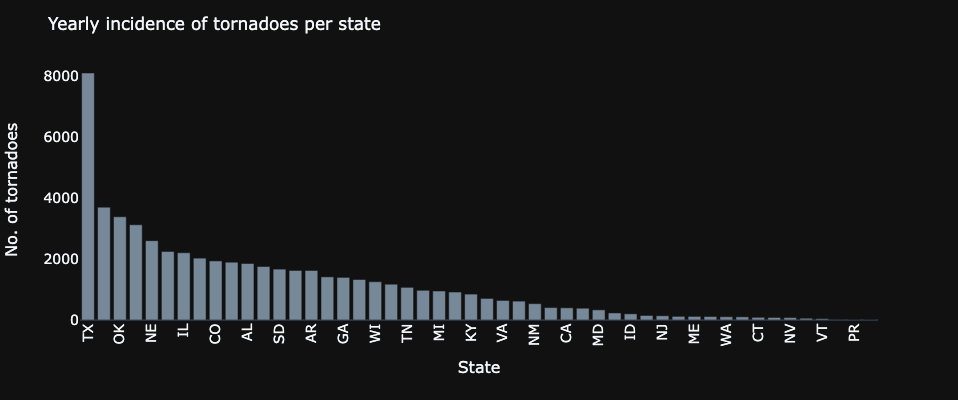

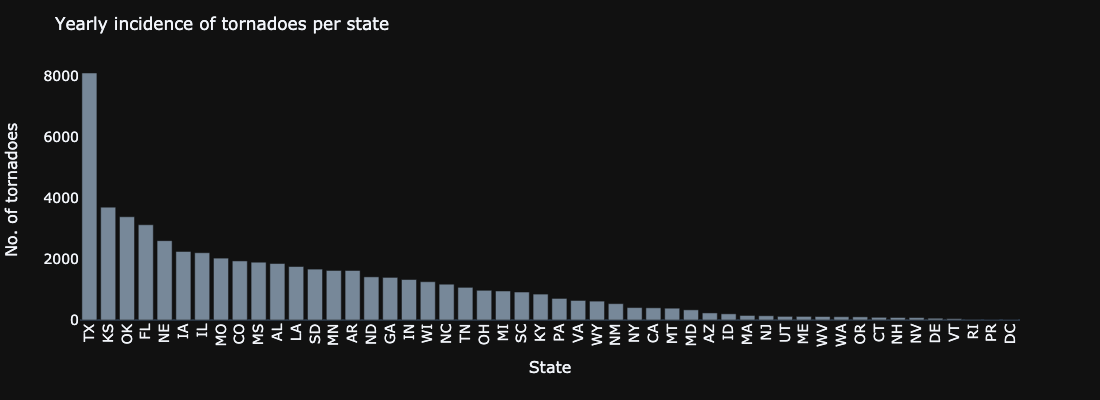

In [53]:
import plotly.express as px
import plotly.graph_objects as go


colors = ['lightslategray',] * 50 

fig = go.Figure(px.bar(x=state_inc.ST, y=state_inc.ST_INC))


fig.update_layout(title = 'Yearly incidence of tornadoes per state',
                 template='plotly_dark', width=1100, height=400,
                 xaxis_title="State", yaxis_title="No. of tornadoes",
                 xaxis_tickangle=-90)

fig.update_layout(xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
                  yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14), showgrid=False))

fig.update_traces(marker_color=colors)

fig.show()
fig.show('png')


# Exporting a static version of this figure 
config = {
    'format': 'png',
    'engine': 'kaleido',
    'scale': 3,
}

fig.write_image('State_inc.png', **config)


## 3. Magnitude analysis 

In [54]:
# Group data on magnitude column 'MAG'

mag_counts = df['MAG'].value_counts().reset_index()
mag_counts.columns = ['MAG', 'Counts'] 
mag_counts.set_index('MAG', inplace = True)

In [55]:
# add a new column with normalized values of Counts 

mag_counts['Normalized'] = mag_counts.apply(lambda col: ((col['Counts'] / mag_counts.Counts.sum())*100).round(2), axis=1)

mag_counts

Counts  Normalized
MAG                    
0     26550       46.69
1     19076       33.55
2      8427       14.82
3      2252        3.96
4       507        0.89
5        54        0.09

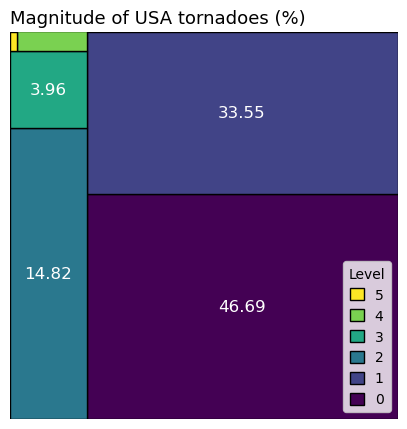

In [56]:
# Plot a treemap to represent a relative distribution of tornado magnitude over all 60 years 
import numpy as np
import squarify
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


fig, ax = plt.subplots(figsize=(5, 7))

labels = [i for i in mag_counts.index]
num_labels_in_legend = 6


ax = squarify.plot(
    sizes=mag_counts['Counts'],
    label=[i for i in mag_counts['Normalized'] if i > 1], # to only display labels with values of > 1% 
    color=plt.cm.viridis(np.linspace(0, 1, len(mag_counts.index))), 
    ec='black',
    text_kwargs={'color': 'white', 'size': 12}
)

# Add legend 
plt.legend(handles=ax.containers[0][:-num_labels_in_legend - 1:-1], 
           labels=labels[:-num_labels_in_legend - 1:-1],
           handlelength=1, handleheight=1, loc = 'lower right', title = 'Level')
ax.axis('off')
ax.invert_xaxis()
ax.set_aspect('equal')
ax.set_title('Magnitude of USA tornadoes (%)',loc = 'left', fontsize = 13)

plt.show()


# Export the image at 300 dpi
fig.savefig('Mag_treemap.png', dpi=300)

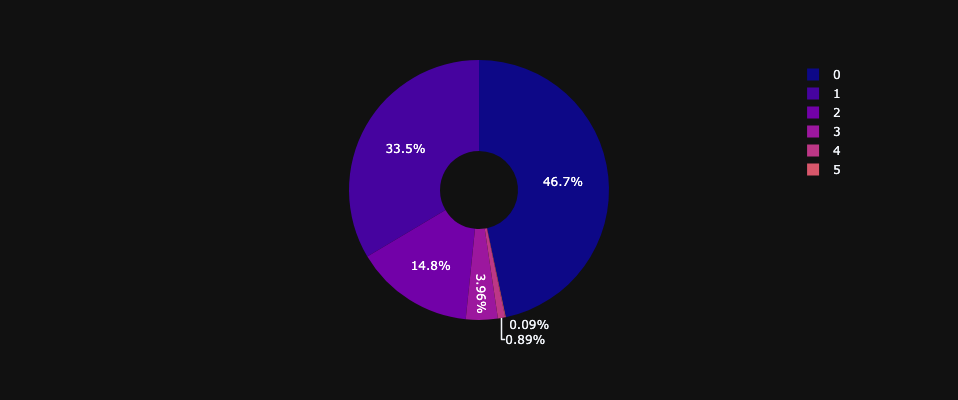

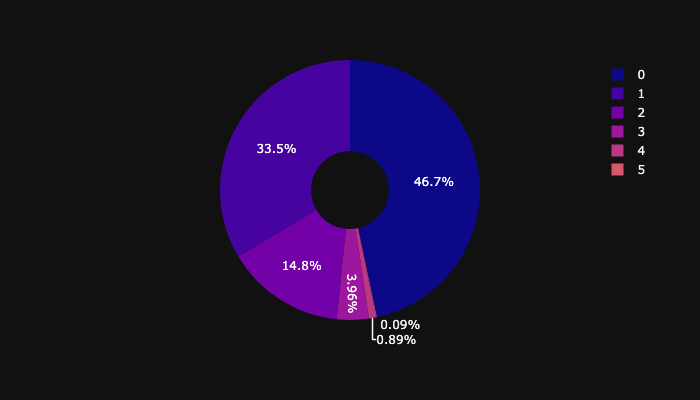

In [57]:
# Pie plot for the dashbord showing the same as above 

fig = px.pie(mag_counts, values='Normalized', names=mag_counts.index, hole=.3, 
             template="plotly_dark", width=700, height=400, 
             color_discrete_sequence= px.colors.sequential.Plasma)

fig.show()
fig.show('png')

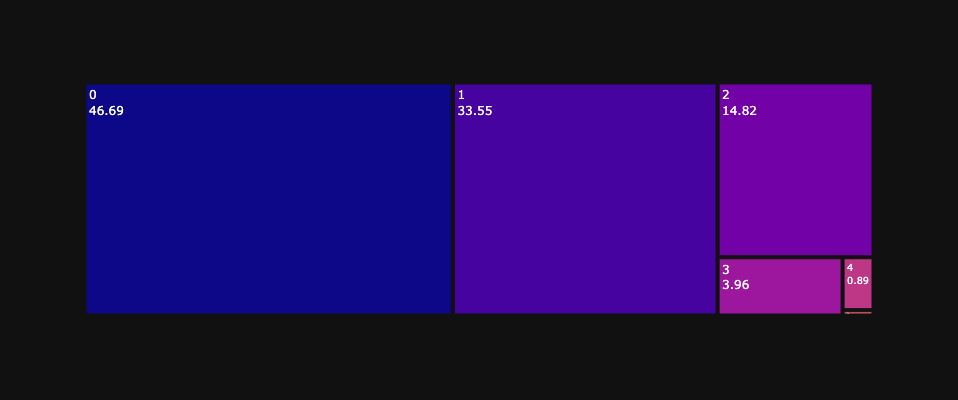

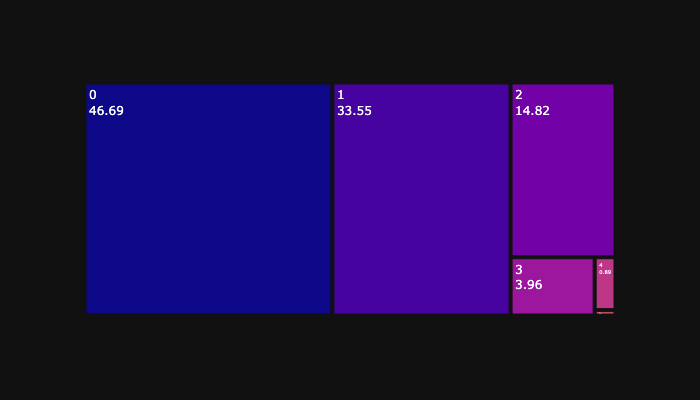

In [58]:
# An alternative interactive treemap plot  

fig = px.treemap(mag_counts, path=[mag_counts.index], values='Normalized', 
                 template="plotly_dark", width=700, height=400, 
                 color_discrete_sequence= px.colors.sequential.Plasma, hover_data=['Normalized'])

fig.update_layout(legend_title='Category', legend_orientation='h')
fig.update_traces(textinfo='label+value')

fig.show()
fig.show('png')

## 4. Injuries and fatalities caused by tornadoes

In [59]:
# Analyse contibution of each magnitude of tornado towards injury incidence 

inj =df.groupby('MAG')[['INJ']].sum()

total = inj.sum().sum()  # Calculate the total sum of all columns

inj_perc = (inj / total) * 100 
inj_perc

INJ
MAG           
0     0.895416
1     7.765028
2    17.269754
3    25.254771
4    35.469410
5    13.345621

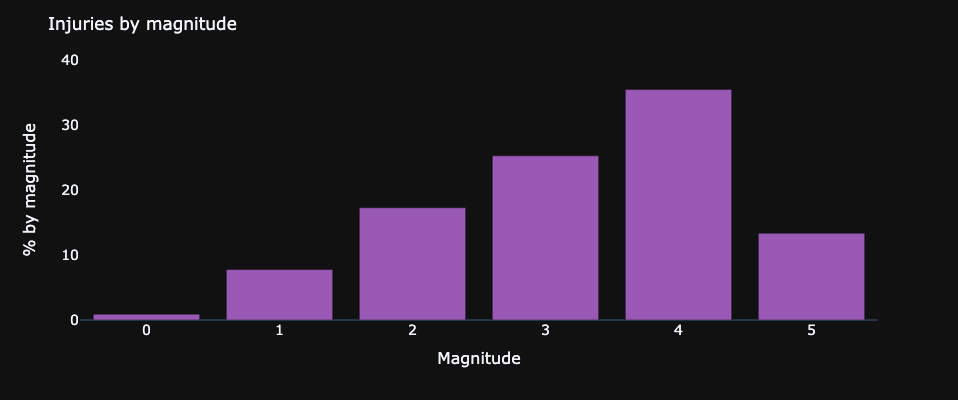

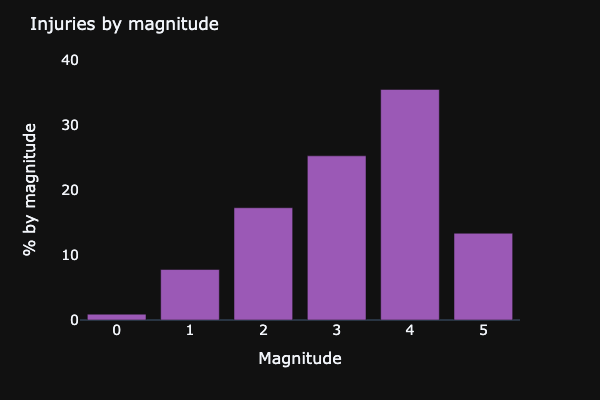

In [60]:
import plotly.express as px
import plotly.graph_objects as go


colors = ['#9B59B6',] * 6

fig = go.Figure(px.bar(x=inj_perc.index, y=inj_perc.INJ))


fig.update_layout(title = 'Injuries by magnitude',
                 template='plotly_dark', width=600, height=400,
                 xaxis_title="Magnitude", yaxis_title="% by magnitude",
                 )

fig.update_layout(xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
                  yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14), showgrid=False, range=[0, 40]))

fig.update_traces(marker_color=colors)

fig.show()
fig.show('png')



# Exporting a static image 
config = {
    'format': 'png',
    'engine': 'kaleido',
    'scale': 3,
}

fig.write_image('Inj_per_mag.png', **config)

In [61]:
# Analyse contibution of each magnitude of tornado towards fatality incidence 

fat =df.groupby('MAG')[['FAT']].sum()

total = fat.sum().sum()  # Calculate the total sum of all columns

fat_perc = (fat / total) * 100 
fat_perc

FAT
MAG           
0     0.450174
1     4.419890
2    10.354000
3    24.268467
4    38.489871
5    22.017598

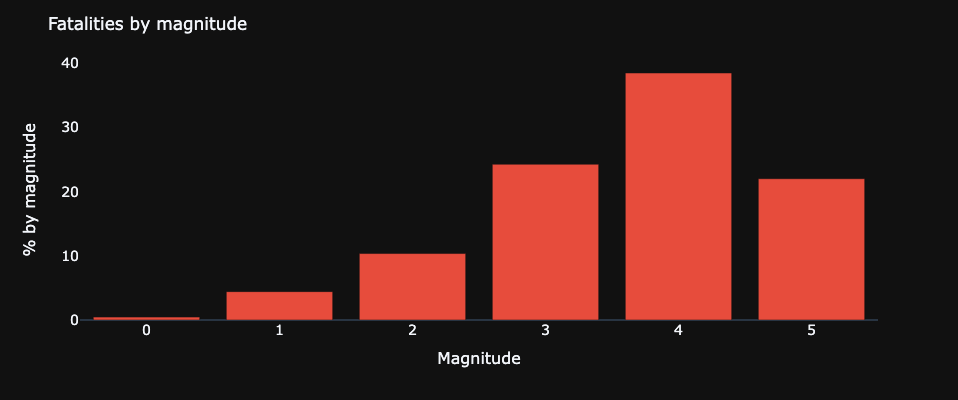

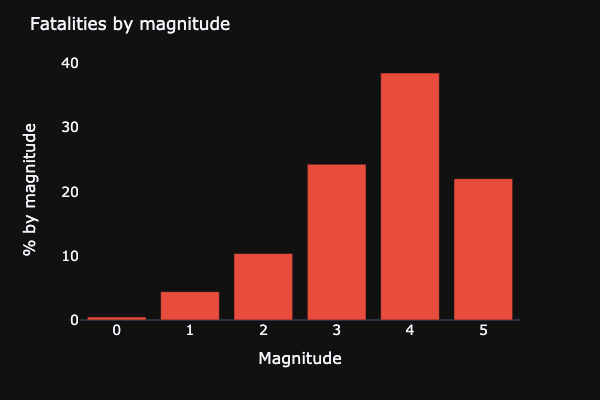

In [62]:
import plotly.express as px
import plotly.graph_objects as go


colors = ['#E74C3C',] * 6

fig = go.Figure(px.bar(x=fat_perc.index, y=fat_perc.FAT))


fig.update_layout(title = 'Fatalities by magnitude',
                 template='plotly_dark', width=600, height=400,
                 xaxis_title="Magnitude", yaxis_title="% by magnitude")

fig.update_layout(xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
                  yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14), showgrid=False))

fig.update_traces(marker_color=colors)



# Show the plot
fig.show()
fig.show('png')


config = {
    'format': 'png',
    'engine': 'kaleido',
    'scale': 3,
}

# Export the plot as a TIFF file with transparency
fig.write_image('Fat_per_mag.png', **config)


In [63]:
# Analyse yearly incidence of injuries and fatalities 

fat_inj = df.groupby('YR')[['INJ', 'FAT']].sum()
fat_inj

INJ  FAT
YR             
1954   715   36
1955   926  129
1956  1308   81
1957  1976  192
1958   535   67
1959   734   58
1960   737   46
1961  1087   52
1962   551   30
1963   537   31
1964  1143   73
1965  5197  301
1966  2030   98
1967  2144  114
1968  2522  131
1969  1310   66
1970  1355   73
1971  2714  159
1972   976   27
1973  2396   89
1974  6824  366
1975  1457   60
1976  1195   44
1977   771   43
1978   919   53
1979  3014   84
1980  1157   28
1981   798   24
1982  1276   64
1983   750   34
1984  2499  122
1985  1299   94
1986   536   15
1987  1018   59
1988   688   32
1989  1270   50
1990  1177   53
1991   864   39
1992  1323   39
1993   948   33
1994  1074   69
1995   928   30
1996   703   26
1997  1033   68
1998  1868  130
1999  1838   94
2000   829   41
2001   743   40
2002   966   55
2003  1088   54
2004   395   35
2005   537   38
2006   988   67
2007   617   81
2008  1703  126
2009   349   22
2010   701   45
2011  5483  553
2012   822   69
2013   754   55

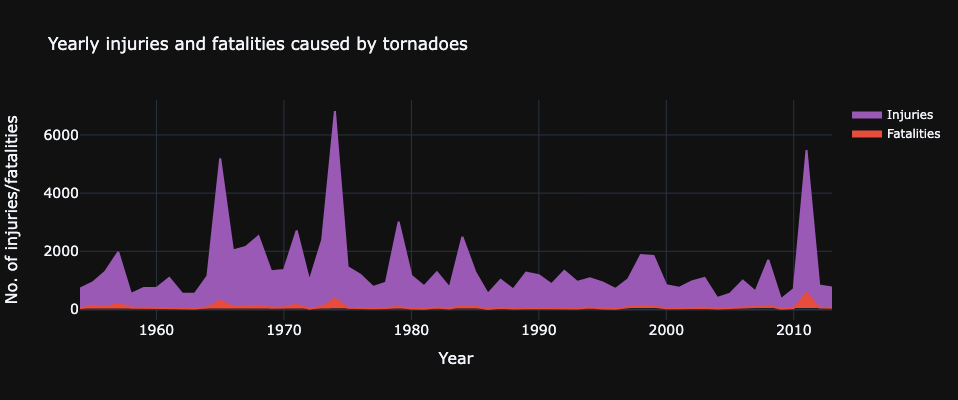

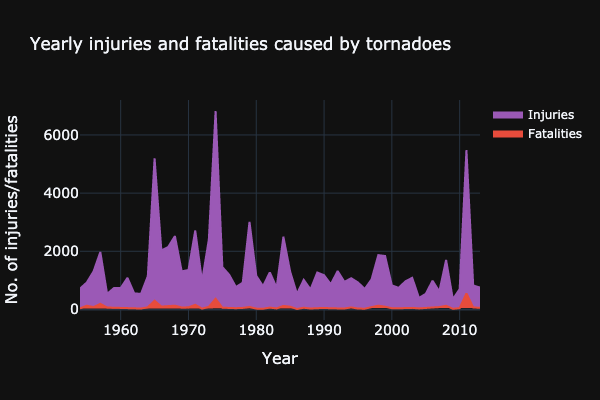

In [64]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=fat_inj.index, y=fat_inj['FAT'], fill='toself', name = 'Fatalities', 
                         fillcolor = "#e74c3c", line=dict(color='#e74c3c', width=2))) 
fig.add_trace(go.Scatter(x=fat_inj.index, y=fat_inj['INJ'], fill='tonexty', name = 'Injuries', 
                         fillcolor = "#9b59b6", line=dict(color='#9b59b6', width=2)))

fig.update_layout(title = 'Yearly injuries and fatalities caused by tornadoes', 
                  template='plotly_dark', width=600, height=400,
                 xaxis_title="Year", yaxis_title="No. of injuries/fatalities",
                 xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
                  yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)))


fig.show()
fig.show('png')


# Exporting a static image 
config = {
    'format': 'png',
    'engine': 'kaleido',
    'scale': 3,
}

fig.write_image('Yearly_injuries_fatalities.png', **config)

## 5. Geographical distribution of tornadoes

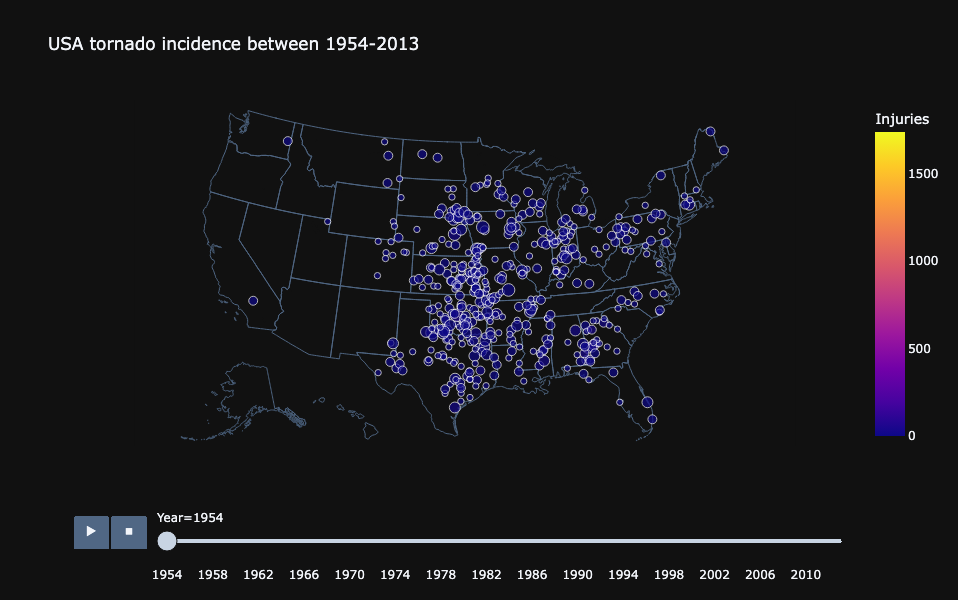

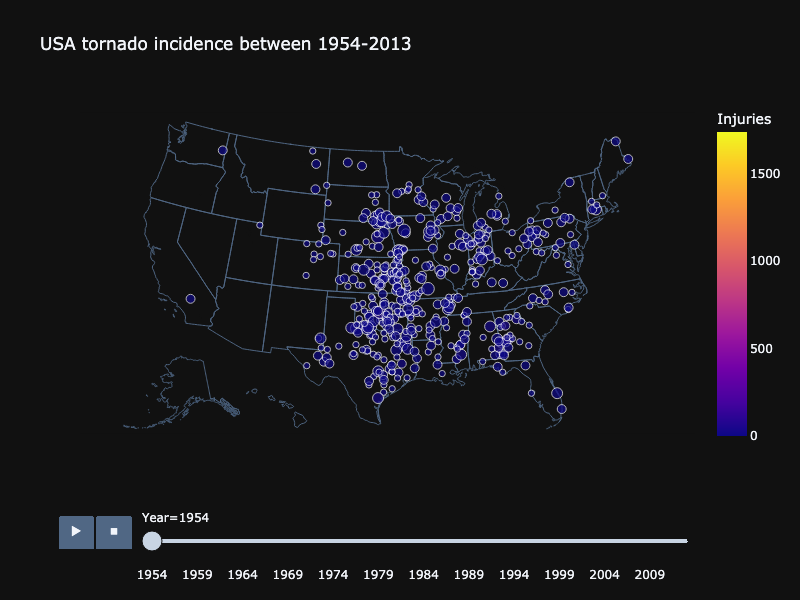

In [65]:
# Plotting location of each tornado event using longitude and latitude data 
# The size of a bubble represents magnitude and color represents injuries caused by the tornadoes

import plotly.graph_objects as go
import plotly.express as px 

fig = go.Figure(data= px.scatter_geo(df,
                    lat="SLAT",
                    lon="SLON",
                    title="Meteorite Landings",
                    template="plotly_dark",
                    size = "MAG",
                    size_max = 10,
                    color="INJ",
                    animation_frame='YR',
                    width=800, 
                    height=600,
                    range_color=[df['INJ'].min(), df['INJ'].max()],
                    labels={'MAG':'Magnitude',
                            'FAT': 'Fatalities', 
                            'YR': 'Year',
                            'INJ':'Injuries'
                           },
                    hover_name = df['ST'].astype(str)
                    ))

fig.update_layout(title = 'USA tornado incidence between 1954-2013',
                  geo_scope='usa',
                  showlegend = True)

fig.update_geos(visible=True, resolution=50)

fig.show()
fig.show('png')




# Figure export as a static image 
config = {
    'format': 'png',
    'engine': 'kaleido',
    'scale': 3,
}

fig.write_image('Map.png', **config)